In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

In [2]:
train=pd.read_csv('train_2v.csv')
test=pd.read_csv('test_2v.csv')
train.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [4]:
train.shape

(43400, 12)

In [5]:
test.shape

(18601, 11)

# Data Cleaning

In [6]:
train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [7]:
test.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

# Removing missing values

In [11]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print("shape of train data: {}",format (train_data.shape))
print("Shape of test data: {}",format (test_data.shape))

shape of train data: {} (29072, 12)
Shape of test data: {} (12423, 11)


# Pattern Recognition

In [12]:
train_data['stroke'].value_counts()

0    28524
1      548
Name: stroke, dtype: int64

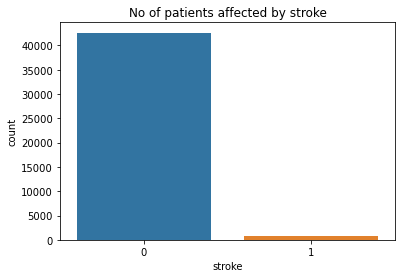

In [13]:
sns.countplot(x=train["stroke"])
plt.title("No of patients affected by stroke")
plt.show()

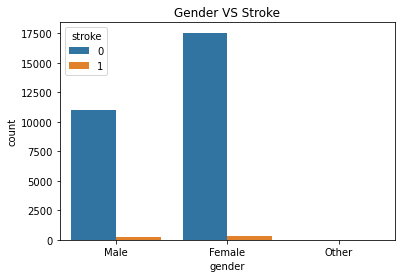

In [14]:
sns.countplot(x=train_data['gender'],hue=train_data['stroke'])
plt.title("Gender VS Stroke")
plt.show()

In [15]:
train_data.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: stroke, dtype: int64

In [16]:
train_data['smoking_status'].value_counts()

never smoked       15747
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

In [17]:
train_data.groupby(['gender'])['smoking_status'].value_counts()

gender  smoking_status 
Female  never smoked       10406
        formerly smoked     3926
        smokes              3520
Male    never smoked        5340
        formerly smoked     3167
        smokes              2706
Other   formerly smoked        6
        never smoked           1
Name: smoking_status, dtype: int64

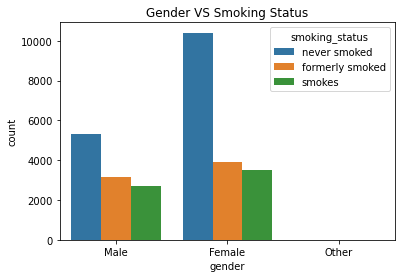

In [18]:
sns.countplot(x=train_data['gender'],hue=train_data['smoking_status'])
plt.title('Gender VS Smoking Status')
plt.show()

Conversion of String type into int type

In [19]:
str_data=train_data.select_dtypes(include=['object'])
str_dt=test_data.select_dtypes(include=['object'])

In [20]:
int_data=train_data.select_dtypes(include=['integer','float'])
int_dt=test_data.select_dtypes(include=['integer','float'])

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [23]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


# Modeling & Predicting the data

In [24]:
xtrain=features.drop(['stroke'],axis=1)
xtrain.shape

(29072, 11)

In [25]:
ytrain=features['stroke']
ytrain.head()
ytrain.shape

(29072,)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain)

In [27]:
x_test.shape

(7268, 11)

In [28]:
y_test.shape

(7268,)

In [29]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
1286,1,0,2,0,2,8085,18.0,0,0,143.45,32.0
34990,1,1,3,1,1,15227,52.0,1,0,224.64,32.8
39700,0,1,2,1,0,39619,65.0,0,0,61.40,30.6
2563,1,1,0,1,0,72776,26.0,0,0,94.24,29.2
1383,1,1,2,1,2,9011,59.0,0,0,93.58,25.1


In [30]:
y_train.head()

1286     0
34990    0
39700    0
2563     0
1383     0
Name: stroke, dtype: int64

# Naive_Bayes

In [31]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
16628,0,1,2,1,1,48439,79.0,0,0,232.75,18.0
11711,0,1,2,1,0,58607,65.0,0,0,125.63,19.9
1972,1,1,2,0,1,59993,40.0,0,0,60.96,11.5
14701,0,0,4,0,1,55343,12.0,0,0,118.66,19.4
40117,0,0,2,1,1,21063,25.0,0,0,80.37,26.1


In [32]:
y_test.head()

16628    1
11711    0
1972     0
14701    0
40117    0
Name: stroke, dtype: int64

In [33]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [34]:
predict=model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
test_score=model.score(x_test,y_test)
print("NBtest Score:",test_score)

NBtest Score: 0.9726197028068244


In [36]:


nb_conf_mtr=pd.crosstab(y_test,predict)
nb_conf_mtr

col_0,0,1
stroke,,
0,7066,53
1,146,3


# Report for Naive_Bayes

In [37]:
from sklearn.metrics import classification_report

In [38]:
nbreport=classification_report(y_test, predict)
print(nbreport)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7119
           1       0.05      0.02      0.03       149

    accuracy                           0.97      7268
   macro avg       0.52      0.51      0.51      7268
weighted avg       0.96      0.97      0.97      7268



# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_mod=DecisionTreeClassifier(max_depth=8)
dt_mod.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [41]:
y_predict=dt_mod.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
dt_score=dt_mod.score(x_test,y_test)
print("Decision tree test score:",dt_score)

Decision tree test score: 0.9772977435332967


# Report for decision tree

In [43]:
dectree_report=classification_report(y_test,y_predict)
print(dectree_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7119
           1       0.00      0.00      0.00       149

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.49      7268
weighted avg       0.96      0.98      0.97      7268



In [44]:
dt_conf_mtr=pd.crosstab(y_test,y_predict)
dt_conf_mtr

col_0,0,1
stroke,,
0,7103,16
1,149,0


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred_rfc=rfc.predict(x_test)

In [47]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0      0
stroke      
0       7119
1        149
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7119
           1       0.00      0.00      0.00       149

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.49      7268
weighted avg       0.96      0.98      0.97      7268



E:\INSTALLED SETUPS\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
mlp=MLPClassifier()
mlp.fit(x_train,y_train)
y_pred_mlp=mlp.predict(x_test)

In [50]:
y_pred_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
mlp.score(x_test,y_test)

0.9794991744634012

In [52]:
#cross validating accuracies
from sklearn.model_selection import cross_val_score
cross_val_score(model,x_train,y_train,cv=20,scoring='accuracy').mean()

0.9766099193568734

In [53]:
cross_val_score(dt_mod,x_train,y_train,cv=20,scoring='accuracy').mean()

0.978581807785131

In [54]:
cross_val_score(rfc,x_train,y_train,cv=20,scoring='accuracy').mean()

0.9817006113404924

In [55]:
cross_val_score(mlp,x_train,y_train,cv=20,scoring='accuracy').mean()

0.9804621212758265

# Applying PCA

In [56]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
principalComponents=pca.fit_transform(x_train)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain)

In [58]:
model_2=GaussianNB()
model_2.fit(x_train,y_train)

GaussianNB()

In [59]:
test_score=model_2.score(x_test,y_test)
print("NBtest_score:",test_score)

NBtest_score: 0.9759218492019813


In [60]:
dt_mod=DecisionTreeClassifier(max_depth=8)
dt_mod.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [61]:
ts_dt_score=dt_mod.score(x_test,y_test)
print("Decision tree test score:",ts_dt_score)

Decision tree test score: 0.9800495321959274


In [62]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
y_pred_rfc=rfc.predict(x_test)

In [64]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0      0
stroke      
0       7137
1        131
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7137
           1       0.00      0.00      0.00       131

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



E:\INSTALLED SETUPS\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
rfc.score(x_test,y_test)

0.9819757842597688

In [66]:
mlp=MLPClassifier()
mlp.fit(x_train,y_train)
y_pred_mlp=mlp.predict(x_test)
mlp.score(x_test,y_test)

0.9819757842597688

In [67]:
cross_val_score(model_2,xtrain,ytrain,cv=20,scoring='accuracy').mean()

0.9757842475511938

In [68]:
cross_val_score(dt_mod,xtrain,ytrain,cv=20,scoring='accuracy').mean()

0.9791552553129655

In [69]:
cross_val_score(rfc,xtrain,ytrain,cv=20,scoring='accuracy').mean()

0.9811503212534707

In [70]:
cross_val_score(mlp,xtrain,ytrain,cv=20,scoring='accuracy').mean()

0.9756824092069625